# Importing Important Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from lightgbm import LGBMRegressor

# Importing the Dataset

In [2]:
data = pd.read_csv("/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv")
test = pd.read_csv("/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv")
d = pd.read_csv("/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv")

**Droping total_amount column as it is the targer variable**


In [3]:
data.drop(columns=['total_amount'],inplace=True)

# Exploratry Data Analysis

**Data Information**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               175000 non-null  int64  
 1   tpep_pickup_datetime   175000 non-null  object 
 2   tpep_dropoff_datetime  175000 non-null  object 
 3   passenger_count        168923 non-null  float64
 4   trip_distance          175000 non-null  float64
 5   RatecodeID             168923 non-null  float64
 6   store_and_fwd_flag     168923 non-null  object 
 7   PULocationID           175000 non-null  int64  
 8   DOLocationID           175000 non-null  int64  
 9   payment_type           175000 non-null  object 
 10  extra                  175000 non-null  float64
 11  tip_amount             175000 non-null  float64
 12  tolls_amount           175000 non-null  float64
 13  improvement_surcharge  175000 non-null  float64
 14  congestion_surcharge   168923 non-nu

In [5]:
data.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee
count,175000.000000,168923.000000,175000.000000,168923.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,168923.000000,168923.000000
mean,0.728377,1.357678,5.145930,1.518307,132.710349,132.701429,1.932143,6.127497,0.646816,0.979689,2.246971,0.158825
std,0.445606,0.891283,394.971052,6.514678,76.148799,76.192493,1.948497,4.610834,2.328274,0.198775,0.819216,0.511968
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-7.500000,0.000079,-29.300000,-1.000000,-2.500000,-1.750000
25%,0.000000,1.000000,1.080000,1.000000,67.000000,67.000000,0.000000,3.473321,0.000000,1.000000,2.500000,0.000000
50%,1.000000,1.000000,1.840000,1.000000,133.000000,133.000000,1.000000,5.286217,0.000000,1.000000,2.500000,0.000000
75%,1.000000,1.000000,3.610000,1.000000,199.000000,199.000000,2.500000,7.502746,0.000000,1.000000,2.500000,0.000000
max,2.000000,9.000000,135182.060000,99.000000,264.000000,264.000000,11.750000,484.876151,80.000000,1.000000,2.500000,1.750000


In [6]:
data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'extra', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'congestion_surcharge',
       'Airport_fee'],
      dtype='object')

**Correlation**

In [7]:
# # Compute the correlation matrix
# correlation_matrix = d.corr()

# # Create a correlation heatmap
# plt.figure(figsize=(17, 17))  # Set the figure size
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
# plt.title('Correlation Heatmap')
# plt.show()

**ScatterPlot with Respect to total_amount**

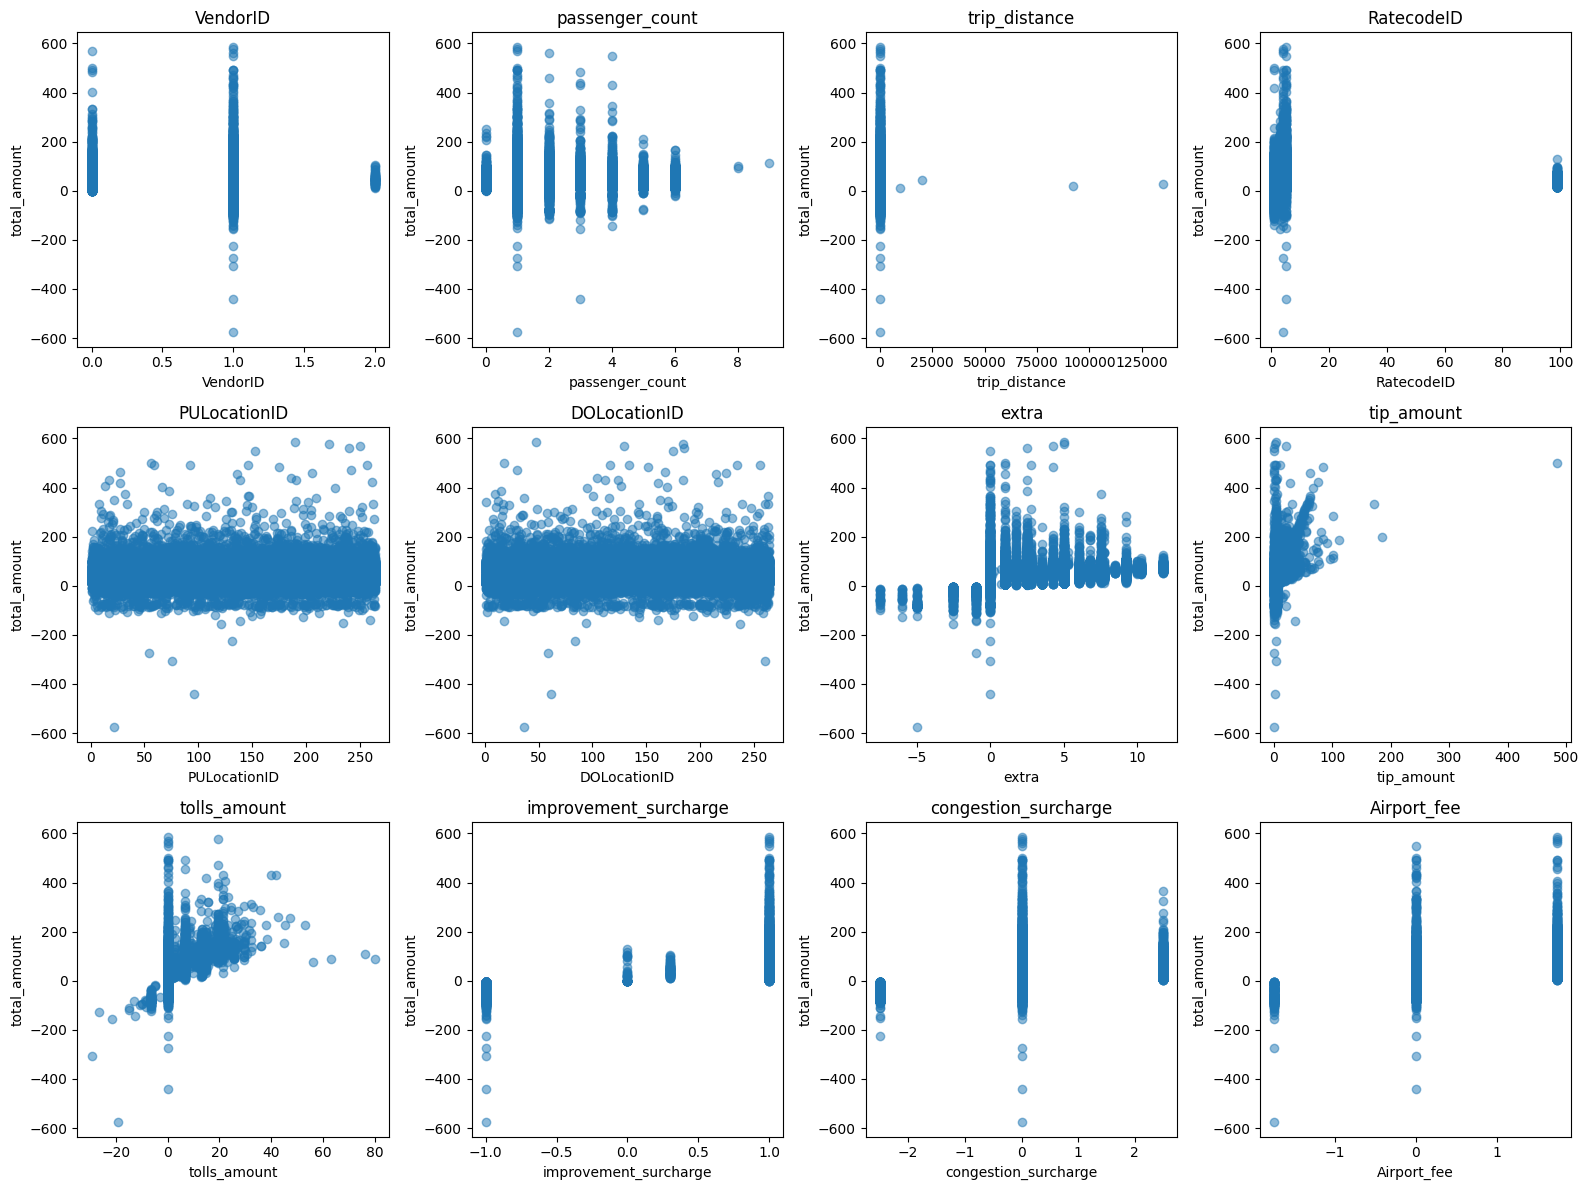

In [8]:
f_reg_data = data.drop(columns=['tpep_pickup_datetime','tpep_dropoff_datetime','payment_type','store_and_fwd_flag'])
# Create subplots for scatter plots
fig, axes = plt.subplots(3, 4, figsize=(16, 12))  # 3 rows and 4 columns for 12 features

# Loop through the columns and create scatter plots
for i, column in enumerate(f_reg_data.columns):
    row, col = divmod(i, 4)
    ax = axes[row, col]
    ax.scatter(f_reg_data[column], d['total_amount'], alpha=0.5)
    ax.set_title(column)
    ax.set_xlabel(column)
    ax.set_ylabel("total_amount")

plt.tight_layout()
plt.show()

**F-regression**

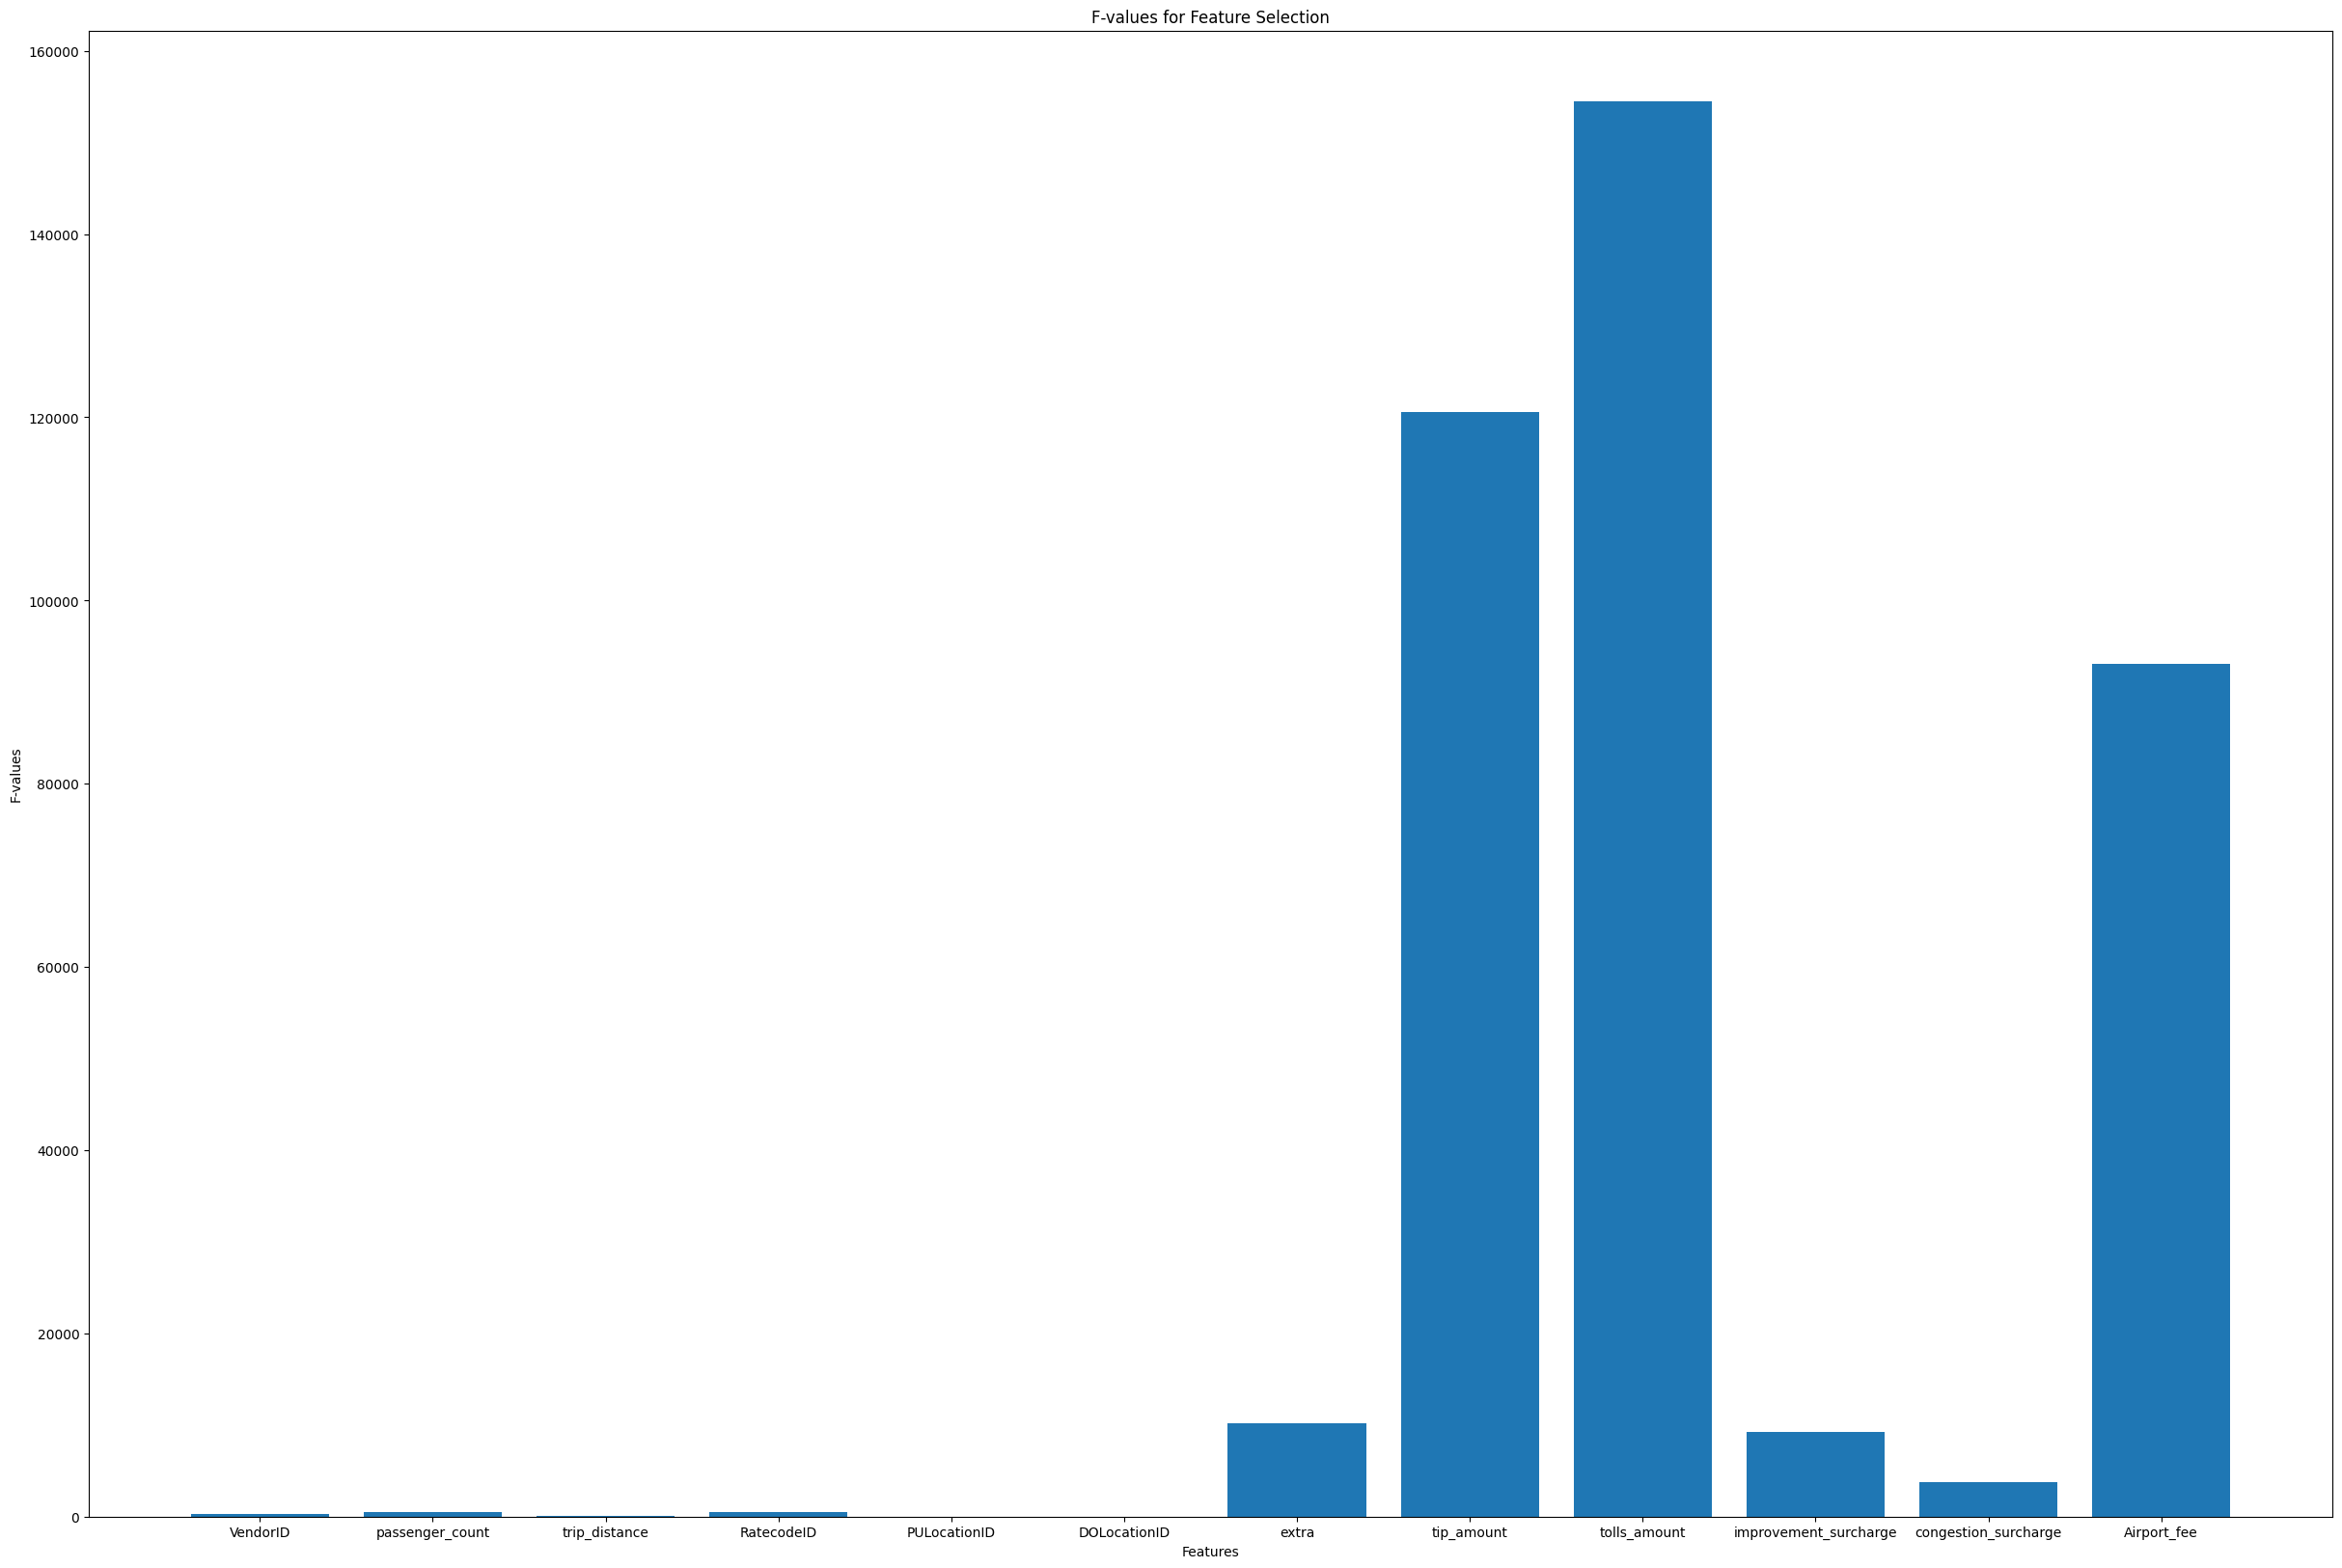

In [9]:
f_reg_data = data.drop(columns=['tpep_pickup_datetime','tpep_dropoff_datetime','store_and_fwd_flag','payment_type',])

f_reg_data = f_reg_data.fillna(f_reg_data.mean())

f_values, p_values = f_regression(f_reg_data, d['total_amount'])

plt.figure(figsize=(30, 20))
plt.bar(range(len(f_values)), f_values, tick_label=f_reg_data.columns)
plt.xlabel('Features')
plt.ylabel('F-values')
plt.title('F-values for Feature Selection')
plt.show()

**Mutual Info**

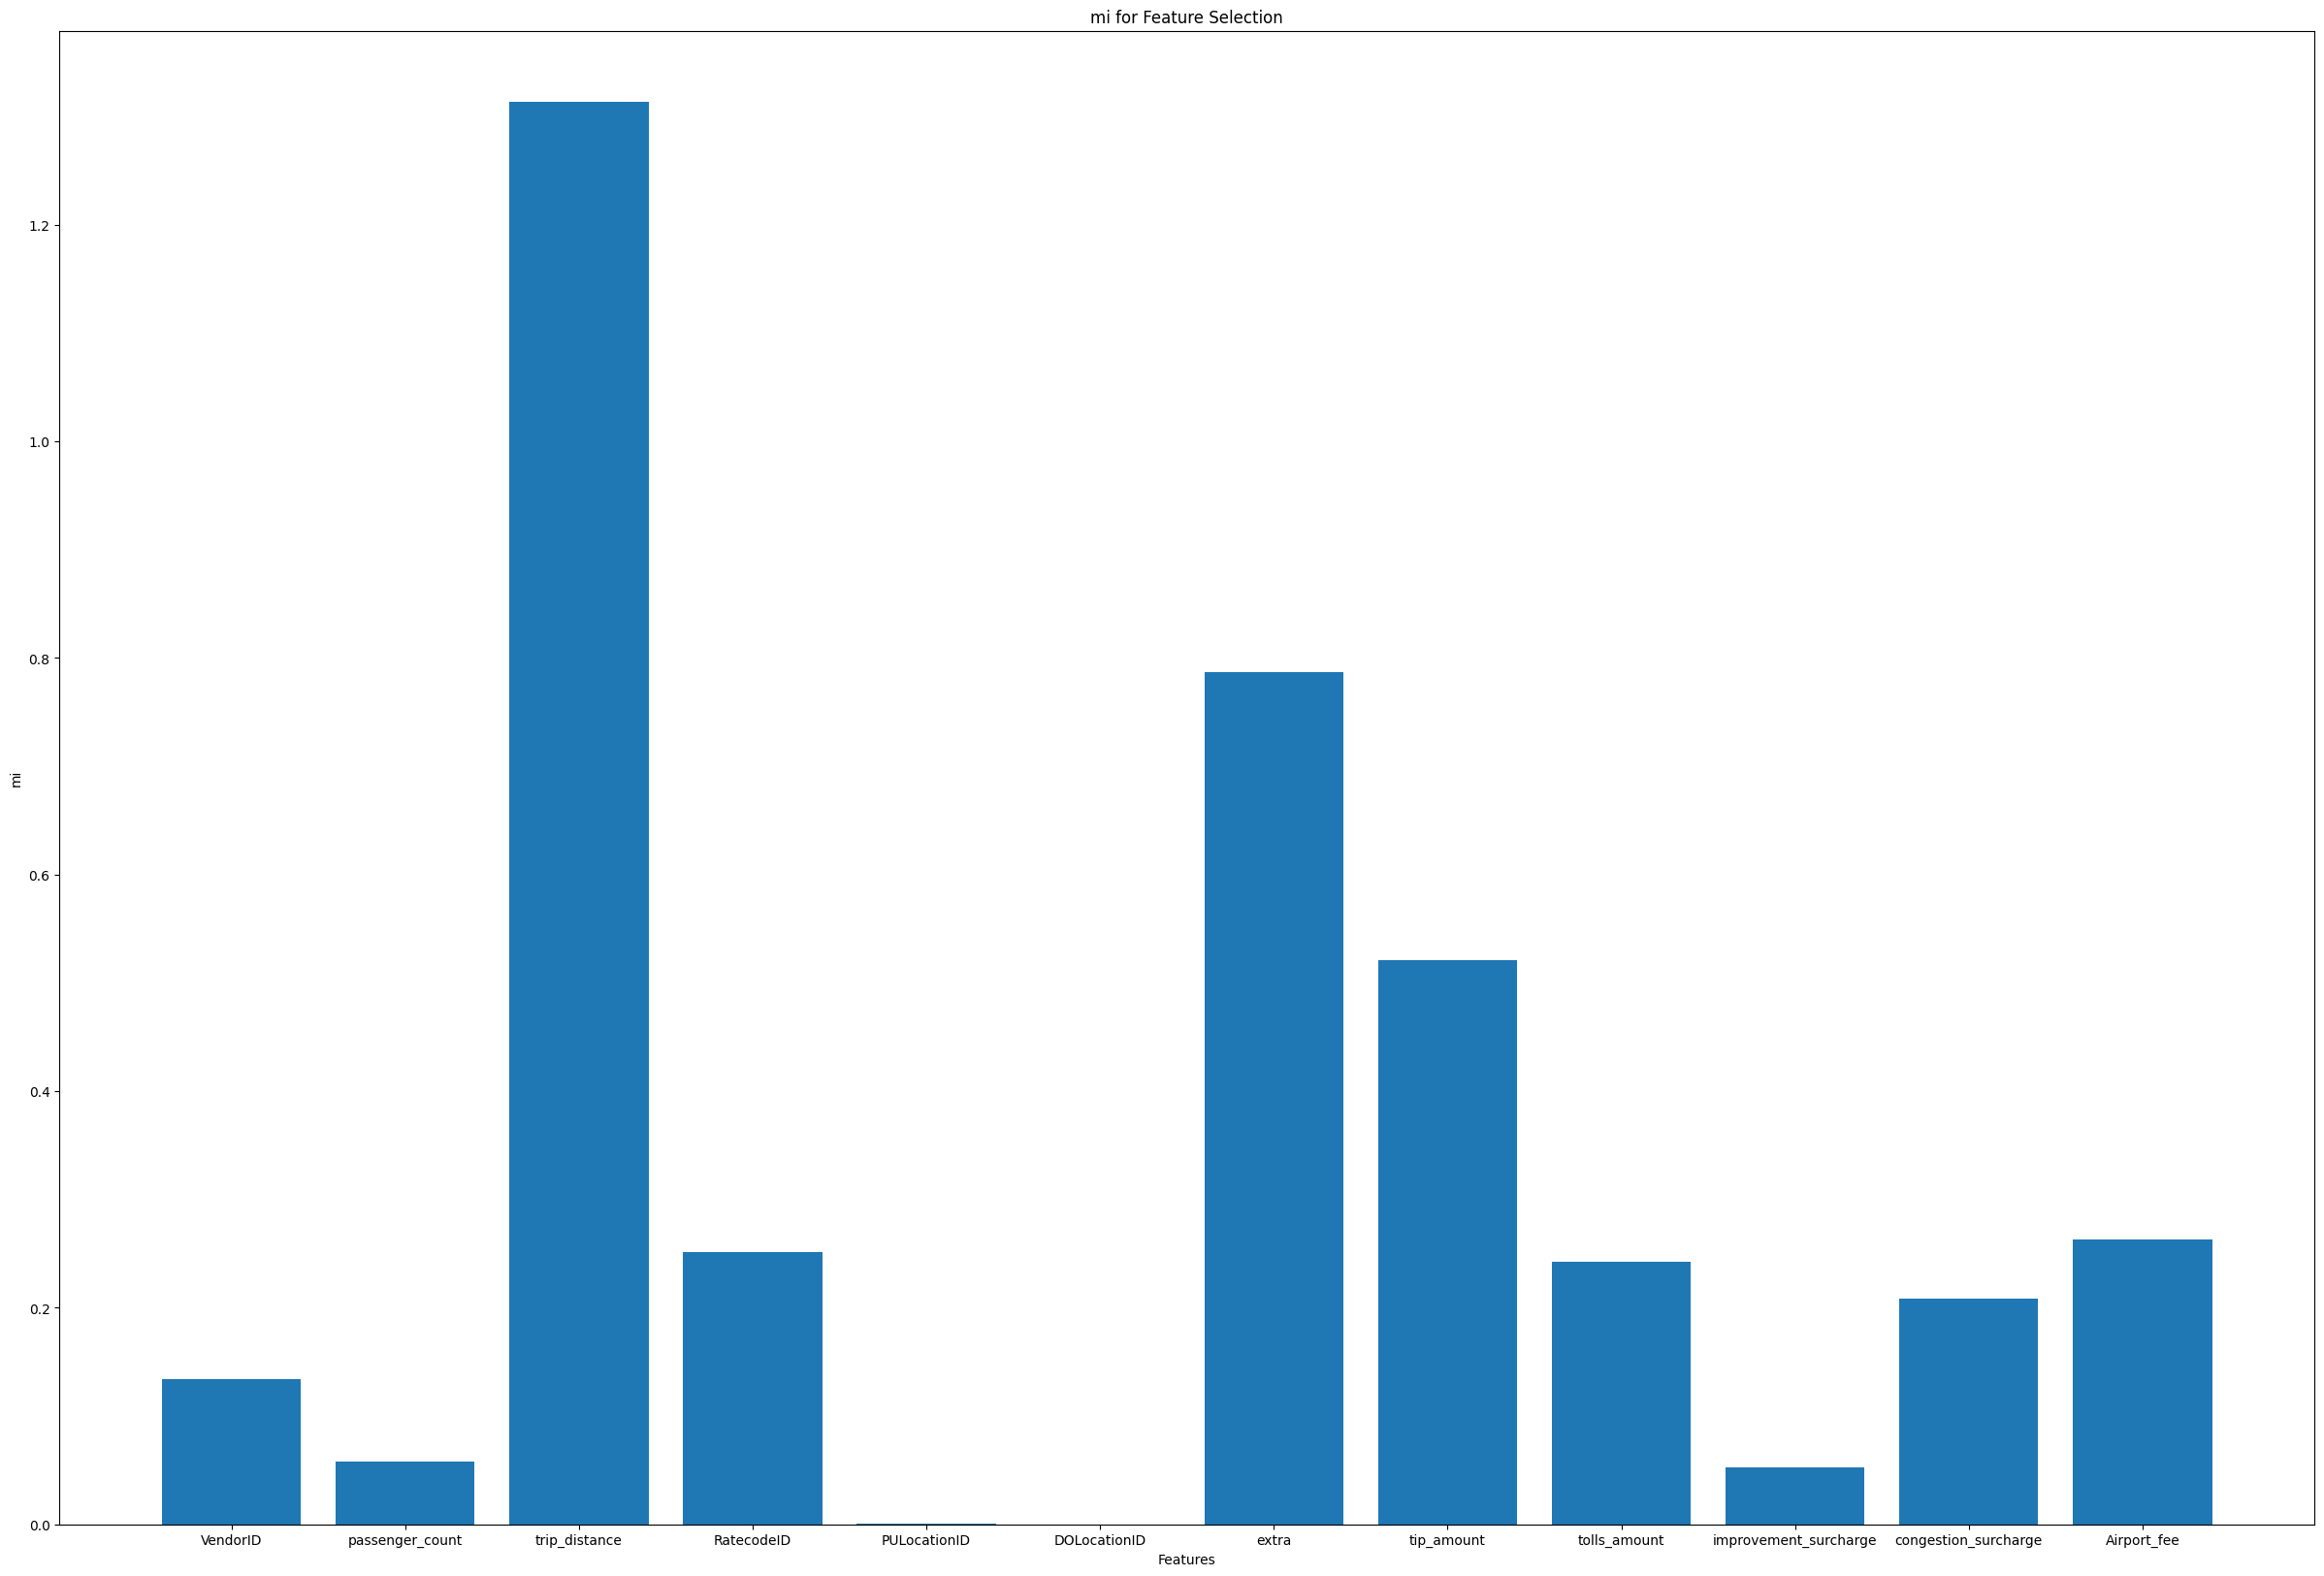

In [10]:
f_reg_data = data.drop(columns=['tpep_pickup_datetime','tpep_dropoff_datetime','store_and_fwd_flag','payment_type',])

f_reg_data = f_reg_data.fillna(f_reg_data.mean())

mi = mutual_info_regression(f_reg_data, d['total_amount'])

plt.figure(figsize=(30, 20))
plt.bar(range(len(mi)), mi, tick_label=f_reg_data.columns)
plt.xlabel('Features')
plt.ylabel('mi')
plt.title('mi for Feature Selection')
plt.show()

**This Python code processes a dataset by iterating through its columns. It categorizes each column as either categorical or numerical based on the number of unique values in that column. Columns with less than 15 unique values are considered categorical and are printed along with their unique values, while columns with 15 or more unique values are considered numerical and are simply added to a numerical columns list. The code separates the dataset into two lists: one for categorical columns (`cat`) and one for numerical columns (`num`).**


In [11]:
columns = data.columns
cat = []
num = []
for i in columns:
  if len(data[i].unique())<15:
    print(i)
    print(data[i].unique())
    print()
    cat.append(i)
  else:
    num.append(i)
    continue

VendorID
[1 0 2]

passenger_count
[ 1.  3.  0.  2. nan  4.  6.  5.  8.  9.]

RatecodeID
[ 1. 99.  3. nan  2.  5.  4.]

store_and_fwd_flag
['N' nan 'Y']

payment_type
['Credit Card' 'Cash' 'Wallet' 'UPI' 'unknown']

improvement_surcharge
[ 1.   0.3 -1.   0. ]

congestion_surcharge
[ 2.5  0.   nan -2.5]

Airport_fee
[ 0.    1.75   nan -1.75]



**This code iterates through a list of numerical column names stored in the `num` list. For each numerical column, it prints the column name, the counts of each unique value in that column, and a blank line to separate the output. This provides a detailed summary of the numerical columns, including their value distributions.**

In [12]:
for i in num:
  print(i)
  print(data[i].value_counts())
  print()

tpep_pickup_datetime
tpep_pickup_datetime
2023-06-28 18:11:16    8
2023-06-28 19:27:11    8
2023-06-28 18:42:04    8
2023-06-29 16:29:15    8
2023-06-30 10:10:19    8
                      ..
2023-06-29 22:20:13    1
2023-06-30 09:33:42    1
2023-06-28 19:26:26    1
2023-06-29 05:51:13    1
2023-06-30 21:26:43    1
Name: count, Length: 109877, dtype: int64

tpep_dropoff_datetime
tpep_dropoff_datetime
2023-06-29 19:08:22    10
2023-06-28 18:36:02     8
2023-06-29 18:45:50     8
2023-06-29 18:04:14     8
2023-06-29 12:28:20     8
                       ..
2023-06-29 14:52:05     1
2023-06-30 13:57:09     1
2023-06-28 17:13:46     1
2023-06-29 12:28:23     1
2023-06-30 22:54:42     1
Name: count, Length: 109713, dtype: int64

trip_distance
trip_distance
0.00     2632
1.00     2431
0.90     2383
1.20     2363
1.10     2297
         ... 
31.42       1
26.80       1
27.53       1
13.29       1
15.17       1
Name: count, Length: 2929, dtype: int64

PULocationID
PULocationID
264    730
85     

**Tolls Amount Feature**





 tolls_ammount max value : 80.0
 tolls_ammount min value : -29.3
 tolls_ammount mean value : 0.65


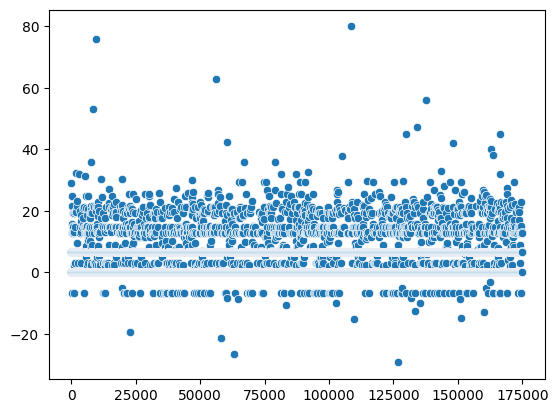

In [13]:
print(f" tolls_ammount max value : {np.max(np.array(data['tolls_amount']))}")
print(f" tolls_ammount min value : {np.min(np.array(data['tolls_amount']))}")
print(f" tolls_ammount mean value : {round(np.mean(np.array(data['tolls_amount'])),2)}")
x = [i for i in range(len(np.array(data['tolls_amount'])))]
y = np.array(data['tolls_amount'])

sns.scatterplot(x=x,y=y)
plt.show()

#-20-50  10gap

**Tip Amount**

 tip_ammount max value : 484.876150598094
 tip_ammount min value : 7.907626361047804e-05
 tip_ammount mean value : 6.13


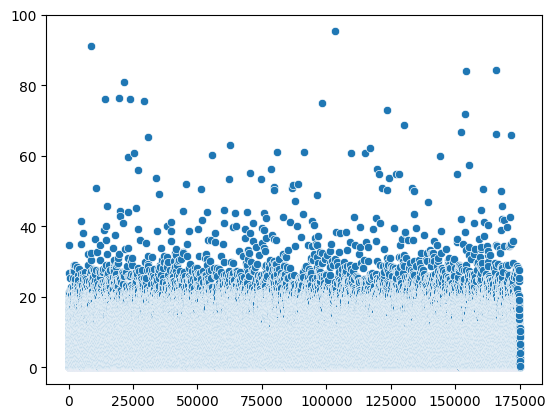

In [14]:
l = []
for i in range(len(np.array(data['tip_amount']))):
  if np.array(data['tip_amount'])[i]>100:
    l.append(0)
  else:
    l.append(np.array(data['tip_amount'])[i])

print(f" tip_ammount max value : {np.max(np.array(data['tip_amount']))}")
print(f" tip_ammount min value : {np.min(np.array(data['tip_amount']))}")
print(f" tip_ammount mean value : {round(np.mean(np.array(data['tip_amount'])),2)}")
x = [i for i in range(len(np.array(data['tip_amount'])))]
y = l

sns.scatterplot(x=x,y=y)
plt.show()

#5-60  5gap

**Trip Distance**

 trip_distance max value : 135182.06
 trip_distance min value : 0.0
 trip_distance mean value : 5.15


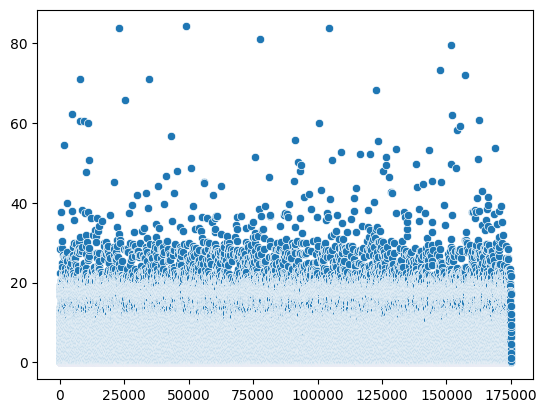

In [15]:
l = []
for i in range(len(np.array(data['trip_distance']))):
  if np.array(data['trip_distance'])[i]>100:
    l.append(0)
  else:
    l.append(np.array(data['trip_distance'])[i])

print(f" trip_distance max value : {np.max(np.array(data['trip_distance']))}")
print(f" trip_distance min value : {np.min(np.array(data['trip_distance']))}")
print(f" trip_distance mean value : {round(np.mean(np.array(data['trip_distance'])),2)}")
x = [i for i in range(len(np.array(data['trip_distance'])))]
y = l

sns.scatterplot(x=x,y=y)
plt.show()

#0-5  0.5

**Extra Feature**

 extra max value : 11.75
 extra min value : -7.5
 extra mean value : 1.93


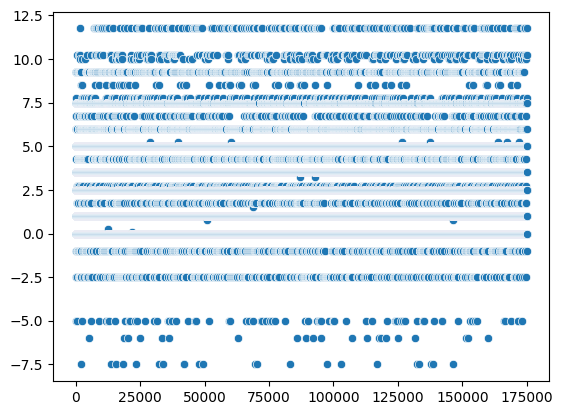

In [16]:
print(f" extra max value : {np.max(np.array(data['extra']))}")
print(f" extra min value : {np.min(np.array(data['extra']))}")
print(f" extra mean value : {round(np.mean(np.array(data['extra'])),2)}")
x = [i for i in range(len(np.array(data['extra'])))]
y = np.array(data['extra'])

sns.scatterplot(x=x,y=y)
plt.show()

# Data Imputation

**The code combines three lists: `cat` (containing categorical column names), `numerical` (containing numerical column names excluding the first two), and `date_list` (containing two date and time column names). These lists are merged into a single list called `col`, which represents a selection of columns for further data analysis or manipulation.**

In [17]:
date_list = ['tpep_pickup_datetime','tpep_dropoff_datetime']
numerical = num[2:]
col = cat + numerical + date_list

In [18]:
col

['VendorID',
 'passenger_count',
 'RatecodeID',
 'store_and_fwd_flag',
 'payment_type',
 'improvement_surcharge',
 'congestion_surcharge',
 'Airport_fee',
 'trip_distance',
 'PULocationID',
 'DOLocationID',
 'extra',
 'tip_amount',
 'tolls_amount',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime']

**This Python function, `Imputer`, performs data imputation by imputing missing values in specific columns. It uses the 'most_frequent' strategy for categorical columns and the 'mean' strategy for numerical columns. The imputed data is returned as Pandas DataFrames for both the original data and a test dataset. This function is useful for handling missing data during data preprocessing.**

In [19]:
def Imputer(cat,numerical,col):
  impute_transform = ColumnTransformer([('cat',SimpleImputer(strategy='most_frequent'),cat),
                                      ('num',SimpleImputer(strategy='mean'),numerical)],
                                     remainder='passthrough')
  imputed_data = impute_transform.fit_transform(data)
  imputed_test_data = impute_transform.fit_transform(test)
  imputed_data_df = pd.DataFrame(data=imputed_data,columns=col)
  imputed_test_data_df = pd.DataFrame(data=imputed_test_data,columns=col)
  imputed_data_df['tpep_dropoff_datetime'].fillna('2023-06-28 18:11:16',inplace=True)
  imputed_data_df['tpep_dropoff_datetime'].fillna('2023-06-29 19:08:22',inplace=True)
  imputed_test_data_df['tpep_dropoff_datetime'].fillna('2023-06-28 18:11:16',inplace=True)
  imputed_test_data_df['tpep_dropoff_datetime'].fillna('2023-06-29 19:08:22',inplace=True)
  return [imputed_data_df,imputed_test_data_df]

**This code calls the `Imputer` function twice to impute missing values in two datasets: the original data and a test dataset. It stores the imputed data in two separate DataFrames, `imputed_data_df` and `imputed_test_data_df`, which can be used for subsequent data analysis or modeling.**

In [20]:
imputed_data_df = Imputer(cat,numerical,col)[0]
imputed_test_data_df = Imputer(cat,numerical,col)[1]

In [21]:
imputed_data_df.isna().sum()

VendorID                 0
passenger_count          0
RatecodeID               0
store_and_fwd_flag       0
payment_type             0
improvement_surcharge    0
congestion_surcharge     0
Airport_fee              0
trip_distance            0
PULocationID             0
DOLocationID             0
extra                    0
tip_amount               0
tolls_amount             0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
dtype: int64

# Feature Engineering
**Extracting Day, month, year, second, hour, Minute from the date columns**

**This code converts specific columns ('tpep_pickup_datetime' and 'tpep_dropoff_datetime') in the `imputed_data_df` and `imputed_test_data_df` DataFrames to datetime objects using the `pd.to_datetime` function. This conversion enables further date and time-related operations and analysis on these columns.**

In [22]:
imputed_data_df['tpep_pickup_datetime'] = imputed_data_df['tpep_pickup_datetime'].apply(pd.to_datetime)
imputed_data_df['tpep_dropoff_datetime'] = imputed_data_df['tpep_dropoff_datetime'].apply(pd.to_datetime)
imputed_test_data_df['tpep_pickup_datetime'] = imputed_test_data_df['tpep_pickup_datetime'].apply(pd.to_datetime)
imputed_test_data_df['tpep_dropoff_datetime'] = imputed_test_data_df['tpep_dropoff_datetime'].apply(pd.to_datetime)

**In this code, a new set of columns is added to the `imputed_data_df` DataFrame, extracting various date and time components from the 'tpep_pickup_datetime' column. Here's a concise summary:**

**For each of the following date and time components:**

- Year
- Month
- Day
- Hour
- Minute
- Second

**The code creates a new column in the `imputed_data_df` DataFrame to store the corresponding component values extracted from the 'tpep_pickup_datetime' column using `pd.DatetimeIndex`. This enables more granular analysis and exploration of the temporal aspects of the data in the DataFrame.**

In [23]:
imputed_data_df['year_pick'] = pd.DatetimeIndex(imputed_data_df['tpep_pickup_datetime']).year
imputed_data_df['month_pick'] = pd.DatetimeIndex(imputed_data_df['tpep_pickup_datetime']).month
imputed_data_df['day_pick'] = pd.DatetimeIndex(imputed_data_df['tpep_pickup_datetime']).day
imputed_data_df['hour_pick'] = pd.DatetimeIndex(imputed_data_df['tpep_pickup_datetime']).hour
imputed_data_df['min_pick'] = pd.DatetimeIndex(imputed_data_df['tpep_pickup_datetime']).minute
imputed_data_df['sec_pick'] = pd.DatetimeIndex(imputed_data_df['tpep_pickup_datetime']).second

**In this code, a similar set of date and time components is added to the `imputed_test_data_df` DataFrame, just like in the previous code. These components are extracted from the 'tpep_pickup_datetime' column and stored in new columns in the `imputed_test_data_df` DataFrame. Here's a concise summary:**

**For each of the following date and time components:**

- Year
- Month
- Day
- Hour
- Minute
- Second

**The code creates new columns in the `imputed_test_data_df` DataFrame to store the corresponding component values extracted from the 'tpep_pickup_datetime' column using `pd.DatetimeIndex`. This allows for detailed time-related analysis and exploration of the test dataset.**

In [24]:
imputed_test_data_df['year_pick'] = pd.DatetimeIndex(imputed_test_data_df['tpep_pickup_datetime']).year
imputed_test_data_df['month_pick'] = pd.DatetimeIndex(imputed_test_data_df['tpep_pickup_datetime']).month
imputed_test_data_df['day_pick'] = pd.DatetimeIndex(imputed_test_data_df['tpep_pickup_datetime']).day
imputed_test_data_df['hour_pick'] = pd.DatetimeIndex(imputed_test_data_df['tpep_pickup_datetime']).hour
imputed_test_data_df['min_pick'] = pd.DatetimeIndex(imputed_test_data_df['tpep_pickup_datetime']).minute
imputed_test_data_df['sec_pick'] = pd.DatetimeIndex(imputed_test_data_df['tpep_pickup_datetime']).second

**In this code, additional date and time components are extracted from the 'tpep_dropoff_datetime' column in the `imputed_data_df` DataFrame and stored in new columns. Here's a concise summary:**

**For each of the following date and time components:**

- Year
- Month
- Day
- Hour
- Minute
- Second

**The code creates new columns in the `imputed_data_df` DataFrame to store the corresponding component values. These values are extracted from the 'tpep_dropoff_datetime' column using `pd.DatetimeIndex`. This allows for detailed analysis and exploration of the time-related aspects of the data, particularly for the drop-off times.**

In [25]:
imputed_data_df['year_drop'] = pd.DatetimeIndex(imputed_data_df['tpep_dropoff_datetime']).year
imputed_data_df['month_drop'] = pd.DatetimeIndex(imputed_data_df['tpep_dropoff_datetime']).month
imputed_data_df['hour_drop'] = pd.DatetimeIndex(imputed_data_df['tpep_dropoff_datetime']).hour
imputed_data_df['min_drop'] = pd.DatetimeIndex(imputed_data_df['tpep_dropoff_datetime']).minute
imputed_data_df['sec_drop'] = pd.DatetimeIndex(imputed_data_df['tpep_dropoff_datetime']).second

**This code adds a set of date and time components to the `imputed_test_data_df` DataFrame, specifically extracted from the 'tpep_dropoff_datetime' column. Here's a brief summary:**

**For each of the following date and time components:**

- Year
- Month
- Day
- Hour
- Minute
- Second

**The code creates new columns in the `imputed_test_data_df` DataFrame to store the corresponding component values. These values are derived from the 'tpep_dropoff_datetime' column using `pd.DatetimeIndex`. This facilitates detailed time-related analysis and exploration of the test dataset, particularly for the drop-off times.**

In [26]:
imputed_test_data_df['year_drop'] = pd.DatetimeIndex(imputed_test_data_df['tpep_dropoff_datetime']).year
imputed_test_data_df['month_drop'] = pd.DatetimeIndex(imputed_test_data_df['tpep_dropoff_datetime']).month
imputed_test_data_df['hour_drop'] = pd.DatetimeIndex(imputed_test_data_df['tpep_dropoff_datetime']).hour
imputed_test_data_df['min_drop'] = pd.DatetimeIndex(imputed_test_data_df['tpep_dropoff_datetime']).minute
imputed_test_data_df['sec_drop'] = pd.DatetimeIndex(imputed_test_data_df['tpep_dropoff_datetime']).second

**This code removes the 'tpep_dropoff_datetime' and 'tpep_pickup_datetime' columns from the `imputed_data_df` and `imputed_test_data_df` DataFrames, effectively dropping them. Here's a concise summary:

1. In the `imputed_data_df` DataFrame, the 'tpep_dropoff_datetime' and 'tpep_pickup_datetime' columns are removed using the `drop` method with the `columns` parameter specifying the column names to be dropped.

2. Similarly, in the `imputed_test_data_df` DataFrame, the same two columns are removed.

The `inplace=True` argument ensures that the changes are made directly in the original DataFrames. This operation is often performed when these columns are no longer needed for analysis or modeling, resulting in more streamlined datasets.**

In [27]:
imputed_data_df.drop(columns=['tpep_dropoff_datetime','tpep_pickup_datetime'],inplace=True)
imputed_test_data_df.drop(columns=['tpep_dropoff_datetime','tpep_pickup_datetime'],inplace=True)

**Tolls_amount Category Creating**

In [28]:
import math

def tolls_amount_maker(numbers):
    # Sample array of numbers (including floats)
    numbers = numbers
    # Define the category list
    categories = []
    start = -20
    end = 80
    gap = 5

    current_category = 0
    while start < end:
        categories.append(current_category)
        start += gap
        current_category += 1

    # Add a "Other" category for values outside the defined range
    categories.append(current_category)

    # Initialize an array to store the category for each number
    category_array = []

    # Enumerate the categories and their corresponding ranges
    for num in numbers:
        categorized = False
        for category, (range_start, range_end) in enumerate(zip(range(-20, 60, 10), range(-10, 70, 10))):
            if range_start <= num < range_end:
                category_array.append(category)
                categorized = True
                break
        if not categorized:
            category_array.append(current_category)

    return category_array

imputed_data_df['tolls_amount_cat'] = tolls_amount_maker(imputed_data_df['tolls_amount'])
imputed_test_data_df['tolls_amount_cat'] = tolls_amount_maker(imputed_test_data_df['tolls_amount'])


**Tip_amount Category Creating**

In [29]:
import math

def tolls_amount_maker(numbers):
    # Sample array of numbers (including floats)
    numbers = numbers
    # Define the category list
    categories = []
    start = 20
    end = 80
    gap = 5

    current_category = 0
    while start < end:
        categories.append(current_category)
        start += gap
        current_category += 1

    # Add a "Other" category for values outside the defined range
    categories.append(current_category)

    # Initialize an array to store the category for each number
    category_array = []

    # Enumerate the categories and their corresponding ranges
    for num in numbers:
        categorized = False
        for category, (range_start, range_end) in enumerate(zip(range(20, 80, 10), range(30, 90, 10))):
            if range_start <= num < range_end:
                category_array.append(category)
                categorized = True
                break
        if not categorized:
            category_array.append(current_category)

    return category_array

imputed_data_df['tip_amount_cat'] = tolls_amount_maker(imputed_data_df['tip_amount'])
imputed_test_data_df['tip_amount_cat'] = tolls_amount_maker(imputed_test_data_df['tip_amount'])

**Trip_distance Feature Creating**

In [30]:
import math

def tolls_amount_maker(numbers):
    # Sample array of numbers (including floats)
    numbers = numbers
    # Define the category list
    categories = []
    start = 20
    end = 80
    gap = 0.1

    current_category = 0
    while start < end:
        categories.append(current_category)
        start += gap
        current_category += 1

    # Add a "Other" category for values outside the defined range
    categories.append(current_category)

    # Initialize an array to store the category for each number
    category_array = []

    # Enumerate the categories and their corresponding ranges
    for num in numbers:
        categorized = False
        for category, (range_start, range_end) in enumerate(zip(range(-20, 60, 10), range(-10, 70, 10))):
            if range_start <= num < range_end:
                category_array.append(category)
                categorized = True
                break
        if not categorized:
            category_array.append(current_category)

    return category_array

imputed_data_df['trip_distance_cat'] = tolls_amount_maker(imputed_data_df['trip_distance'])
imputed_test_data_df['trip_distance_cat'] = tolls_amount_maker(imputed_test_data_df['trip_distance'])

# Train Test Split

**This code prepares data for machine learning:**

1. The target variable `y` is set to the 'total_amount' column from a DataFrame (`train`).

2. The feature data `X` is set to the `imputed_data_df` DataFrame.

3. The data is split into training (`x_train`, `y_train`) and testing (`x_test`, `y_test`) sets using a 80-20 split ratio.

4. The `random_state` parameter is set to 0 for reproducible results in the data split.

**This setup allows for training and evaluating machine learning models on the provided data.**

In [31]:
original_list = np.array(imputed_data_df['store_and_fwd_flag']) # Your list with 1000 values
unique_values = list(set(original_list))  # Get unique values

# Create a dictionary to map unique values to numbers
value_to_number = {value: i + 1 for i, value in enumerate(unique_values)}

# Replace values in the original list with numbers
store_and_fwd_flag_n = [value_to_number[value] for value in original_list]

In [32]:
original_list = np.array(imputed_data_df['payment_type']) # Your list with 1000 values
unique_values = list(set(original_list))  # Get unique values

# Create a dictionary to map unique values to numbers
value_to_number = {value: i + 1 for i, value in enumerate(unique_values)}

# Replace values in the original list with numbers
payment_type_n = [value_to_number[value] for value in original_list]


In [33]:
imputed_data_df['payment_type_n'] = payment_type_n
imputed_data_df['store_and_fwd_flag_n'] = store_and_fwd_flag_n


In [34]:
original_list = np.array(imputed_test_data_df['store_and_fwd_flag']) # Your list with 1000 values
unique_values = list(set(original_list))  # Get unique values

# Create a dictionary to map unique values to numbers
value_to_number = {value: i + 1 for i, value in enumerate(unique_values)}

# Replace values in the original list with numbers
store_and_fwd_flag_n = [value_to_number[value] for value in original_list]

In [35]:
original_list = np.array(imputed_test_data_df['payment_type']) # Your list with 1000 values
unique_values = list(set(original_list))  # Get unique values

# Create a dictionary to map unique values to numbers
value_to_number = {value: i + 1 for i, value in enumerate(unique_values)}

# Replace values in the original list with numbers
payment_type_n = [value_to_number[value] for value in original_list]

In [36]:
imputed_test_data_df['payment_type_n'] = payment_type_n
imputed_test_data_df['store_and_fwd_flag_n'] = store_and_fwd_flag_n

In [37]:
imputed_data_df

,VendorID,passenger_count,RatecodeID,store_and_fwd_flag,payment_type,improvement_surcharge,congestion_surcharge,Airport_fee,trip_distance,PULocationID,...,year_drop,month_drop,hour_drop,min_drop,sec_drop,tolls_amount_cat,tip_amount_cat,trip_distance_cat,payment_type_n,store_and_fwd_flag_n
0,1,1.0,1.0,N,Credit Card,1.0,2.5,0.0,2.14,120.0,...,2023,6,16,34,45,2,12,2,5,2
1,0,1.0,1.0,N,Credit Card,1.0,2.5,0.0,2.7,15.0,...,2023,6,22,1,35,2,12,2,5,2
2,1,1.0,1.0,N,Credit Card,1.0,2.5,0.0,1.15,167.0,...,2023,6,11,13,10,2,12,2,5,2
3,0,1.0,1.0,N,Credit Card,1.0,2.5,0.0,0.4,128.0,...,2023,6,14,20,1,2,12,2,5,2
4,1,3.0,1.0,N,Credit Card,1.0,2.5,0.0,1.1,203.0,...,2023,6,22,22,22,2,12,2,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174995,1,3.0,1.0,N,Credit Card,1.0,2.5,0.0,3.45,147.0,...,2023,6,22,22,22,2,12,2,5,2
174996,1,1.0,1.0,N,Cash,1.0,2.5,1.75,9.44,154.0,...,2023,6,14,4,57,2,12,2,4,2
174997,0,1.0,1.0,N,Credit Card,1.0,2.5,0.0,2.4,168.0,...,2023,6,12,13,34,2,12,2,5,2
174998,1,1.0,1.0,N,Credit Card,1.0,2.5,0.0,4.71,240.0,...,2023,6,19,8,55,2,12,2,5,2


In [38]:
imputed_test_data_df

,VendorID,passenger_count,RatecodeID,store_and_fwd_flag,payment_type,improvement_surcharge,congestion_surcharge,Airport_fee,trip_distance,PULocationID,...,year_drop,month_drop,hour_drop,min_drop,sec_drop,tolls_amount_cat,tip_amount_cat,trip_distance_cat,payment_type_n,store_and_fwd_flag_n
0,1,1.0,1.0,N,Credit Card,1.0,2.5,0.0,4.95,20.0,...,2023,6,0,25,20,2,12,2,5,2
1,1,1.0,1.0,N,Credit Card,1.0,2.5,0.0,2.1,9.0,...,2023,6,17,53,13,2,12,2,5,2
2,1,1.0,1.0,N,Cash,1.0,2.5,0.0,0.95,92.0,...,2023,6,19,23,48,2,12,2,4,2
3,0,1.0,1.0,N,Credit Card,1.0,2.5,0.0,0.8,19.0,...,2023,6,21,46,20,2,12,2,5,2
4,1,1.0,1.0,N,Cash,1.0,0.0,0.0,4.01,131.0,...,2023,6,15,22,17,2,12,2,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,1.0,1.0,N,Credit Card,1.0,2.5,0.0,0.61,48.0,...,2023,6,18,30,36,2,12,2,5,2
49996,1,1.0,1.0,N,Cash,1.0,0.0,1.75,5.02,57.0,...,2023,6,1,10,40,2,12,2,4,2
49997,1,1.0,1.0,N,Credit Card,1.0,2.5,0.0,1.92,150.0,...,2023,6,21,49,37,2,12,2,5,2
49998,0,1.0,1.0,N,Credit Card,1.0,2.5,0.0,5.4,4.0,...,2023,6,2,10,33,2,12,2,5,2


In [39]:
imputed_data_df[['trip_distance','extra',"tip_amount",'tolls_amount']] = imputed_data_df[['trip_distance','extra','tip_amount','tolls_amount']].apply(pd.to_numeric)
d[['trip_distance']] = d[['trip_distance']].apply(pd.to_numeric)
imputed_test_data_df[['trip_distance','extra',"tip_amount",'tolls_amount']] = imputed_test_data_df[['trip_distance','extra','tip_amount','tolls_amount']].apply(pd.to_numeric)
y = d['total_amount']
X = imputed_data_df.drop(columns=['PULocationID','DOLocationID'])
X_test = imputed_test_data_df.drop(columns=['PULocationID','DOLocationID'])
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [40]:
# [d['trip_distance']<90]
# [imputed_data_df['trip_distance']<90]
#drop(columns=['PULocationID','DOLocationID', 'month_pick','year_pick', 'sec_drop','improvement_surcharge','min_pick','sec_pick','year_drop','sec_drop'])

# Scaling and Encoding

In [41]:
# import numpy as np
# import pandas as pd
# from sklearn.datasets import load_breast_cancer
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# xgb = XGBRegressor()
# # Define the forward selection object
# sfs = SFS(xgb, k_features=15, forward=True, floating=False, scoring="r2", cv=5)

# # Perform forward selection on the training set
# sfs.fit(x_train, y_train)

# # Print the selected features
# print("Selected Features:", sfs.k_feature_names_)

# # Evaluate the performance of the selected features on the testing set
# accuracy = sfs.k_score_
# print("Accuracy:", accuracy)

# # Plot the performance of the model with different feature subsets
# sfs_df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
# sfs_df["avg_score"] = sfs_df["avg_score"].astype(float)
# fig, ax = plt.subplots()
# sfs_df.plot(kind="line", y="avg_score", ax=ax)
# ax.set_xlabel("Number of Features")
# ax.set_ylabel("Accuracy")
# ax.set_title("Forward Selection Performance")
# plt.show()

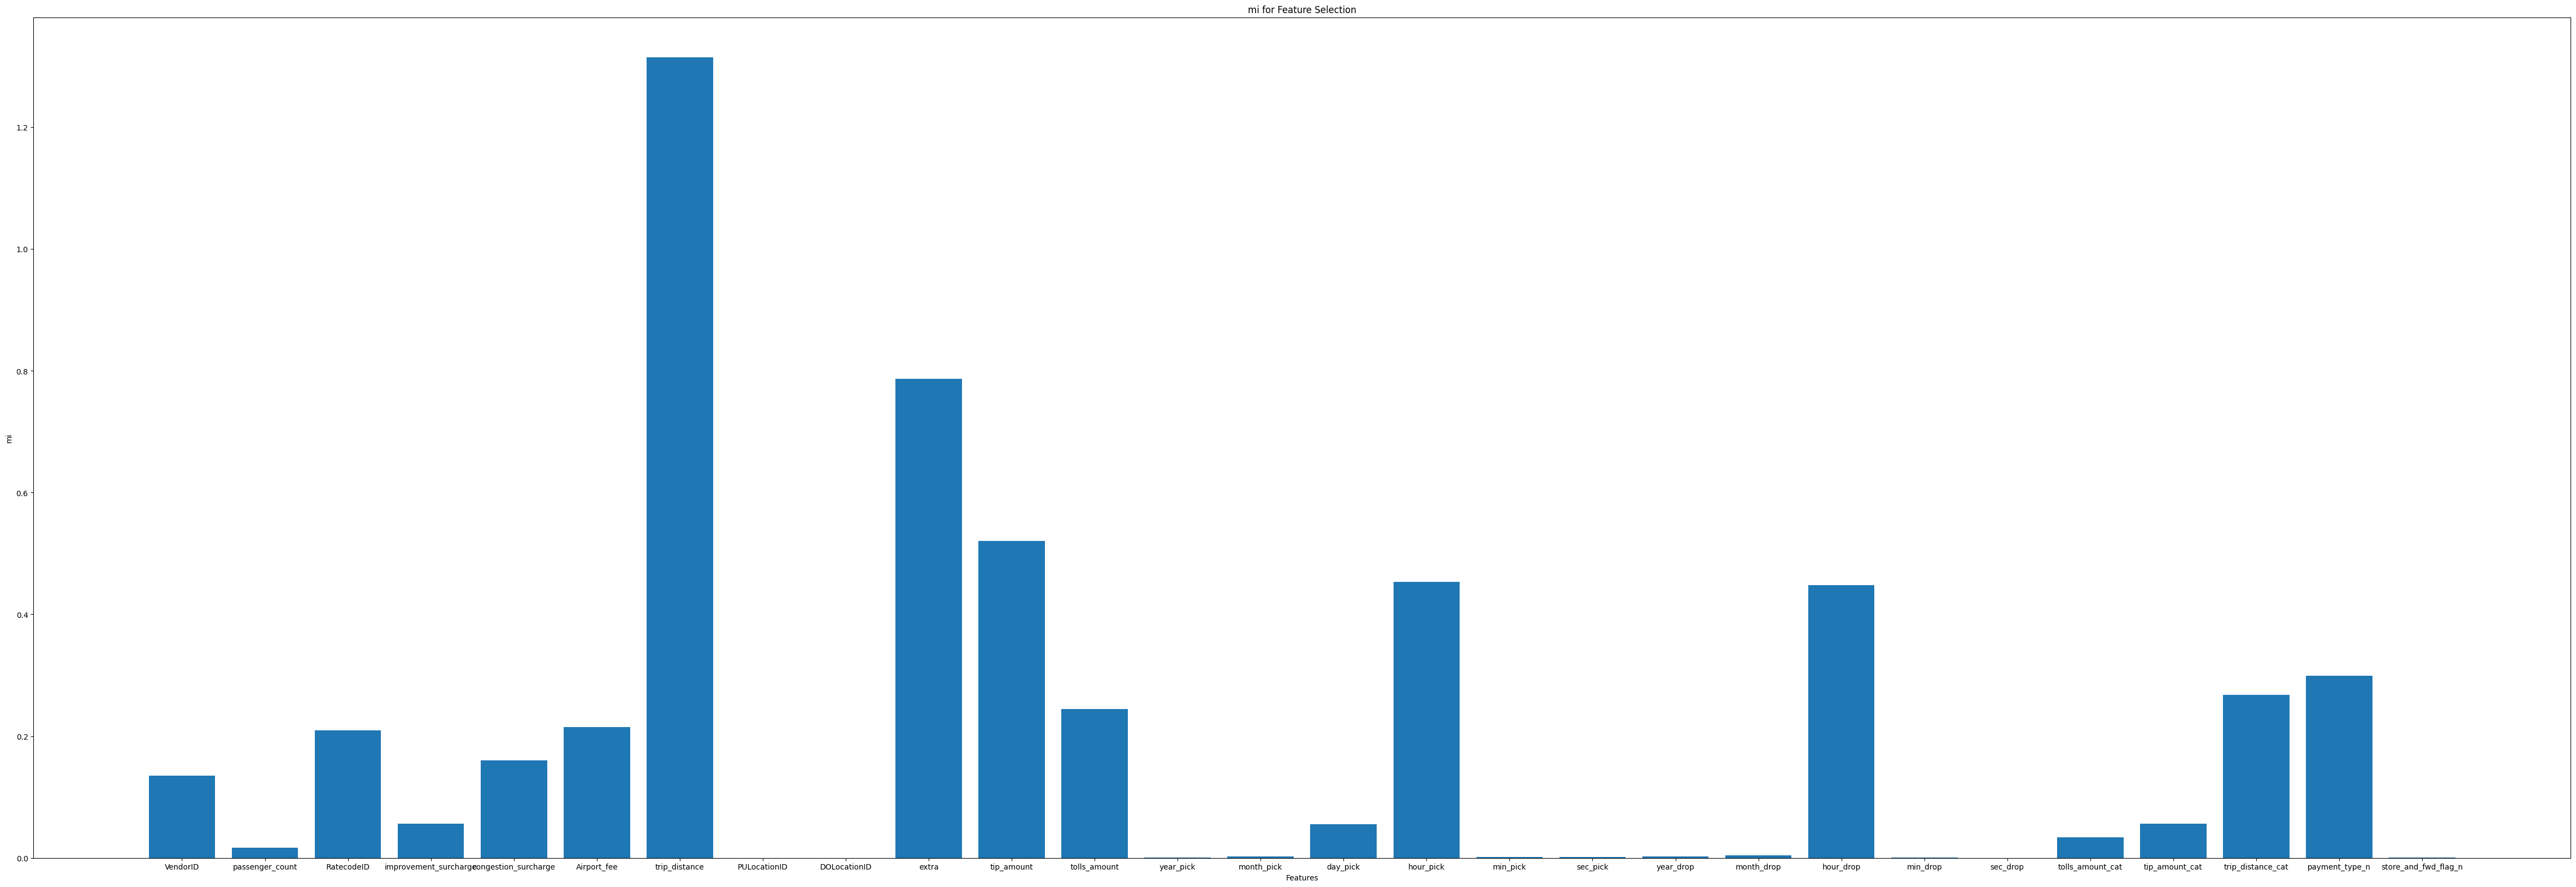

In [42]:
f_reg_data = imputed_data_df.drop(columns=['store_and_fwd_flag','payment_type'])

mi = mutual_info_regression(f_reg_data, y)

plt.figure(figsize=(60, 20))
plt.bar(range(len(mi)), mi, tick_label=f_reg_data.columns)
plt.xlabel('Features')
plt.ylabel('mi')
plt.title('mi for Feature Selection')
plt.show()

In [43]:
# droped - 'PULocationID','DOLocationID','passenger_count', 'month_pick','year_pick', 'sec_drop','improvement_surcharge','min_pick','sec_pick','year_drop','sec_drop'

In [44]:
imputed_data_df.columns


Index(['VendorID', 'passenger_count', 'RatecodeID', 'store_and_fwd_flag',
       'payment_type', 'improvement_surcharge', 'congestion_surcharge',
       'Airport_fee', 'trip_distance', 'PULocationID', 'DOLocationID', 'extra',
       'tip_amount', 'tolls_amount', 'year_pick', 'month_pick', 'day_pick',
       'hour_pick', 'min_pick', 'sec_pick', 'year_drop', 'month_drop',
       'hour_drop', 'min_drop', 'sec_drop', 'tolls_amount_cat',
       'tip_amount_cat', 'trip_distance_cat', 'payment_type_n',
       'store_and_fwd_flag_n'],
      dtype='object')

In [45]:
encode_cat = ['VendorID', 'passenger_count', 'RatecodeID', 'store_and_fwd_flag',
       'payment_type', 'improvement_surcharge', 'congestion_surcharge',
       'Airport_fee', 'year_pick', 'month_pick', 'day_pick',
       'hour_pick', 'min_pick', 'sec_pick', 'year_drop', 'month_drop',
       'hour_drop', 'min_drop', 'sec_drop', 'tolls_amount_cat',
       'tip_amount_cat', 'trip_distance_cat', 'payment_type_n',
       'store_and_fwd_flag_n']

**Encoding without Scaling**

In [46]:
encoder_transform_2 = ColumnTransformer([('encode',OneHotEncoder(handle_unknown='ignore'),encode_cat)],remainder="passthrough")

**Encoder Fitting and Transforming the Data**

In [47]:
encoder_transform_2.fit(X)
x_train_encoded = encoder_transform_2.transform(x_train)
x_test_encoded = encoder_transform_2.transform(x_test)
x_test_real = encoder_transform_2.transform(X_test)

# Model Training


**XGBoost Regressor**

In [48]:
# model = RandomForestRegressor()
# model.fit(x_train_encoded,y_train)
# model.score(x_test_encoded,y_test)

In [49]:
#max_depth=8,learning_rate=0.3,reg_alpha=500

In [50]:
xgb = XGBRegressor(max_depth=9,learning_rate=0.3,reg_alpha=600)
xgb.fit(x_train_encoded,y_train)
xgb.score(x_test_encoded,y_test)

0.9330139065163091

In [51]:
xgb.score(x_train_encoded,y_train)

0.9678308546838938

In [52]:
y_pred = xgb.predict(x_test_real)

In [53]:
# len(y_pred)

In [54]:
# import xgboost as xgb
# import numpy as np
# from sklearn.model_selection import RandomizedSearchCV, train_test_split, GridSearchCV
# from sklearn.metrics import mean_squared_error

# param_dist = {
#     'max_depth': [5,6,7,8],  # Adjusted upper bound to include 9
#     'learning_rate': [0.3],  # Adjusted upper bound to include 3.5
#     'min_child_weight': [1,2,3],  # Adjusted upper bound to include 10
#     'subsample': [0.25,0.5,0.75,1] , # Adjusted upper bound to include 1.0
#     'sampling_method': ['uniform'],
#     'lambda': [50]
# }

# xgboost_model = xgb.XGBRegressor()  # Renamed the model to avoid name conflict

# # Create a RandomizedSearchCV object with the XGBoost model and parameter distribution
# random_search = GridSearchCV(estimator=xgboost_model, param_grid=param_dist, scoring='r2',verbose=3,cv=2,return_train_score=True)

# # Assuming you have defined and split your data as x_train_encoded and y_train
# # Fit the RandomizedSearchCV object to the training data
# random_search.fit(x_train_encoded, y_train)

# # Get the best hyperparameters
# best_params = random_search.best_params_
# print("Best Hyperparameters:", best_params)




# Hyper Parameter Tunning

**XGB Regressor HPT**

# Model Evaluation


In [55]:
# model = ["XGBoost","DecisionTreeRegressor", "MLPRegressor", "ADABoostRegressor","KNNRegressor"]
# scores = [94.819,94.3,91.23,67.29,0]


# plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size
# plt.plot(model, scores, marker='o', linestyle='-')
# plt.title("Model Scores")
# plt.xlabel("Model")
# plt.ylabel("Score")
# plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for better readability

# plt.grid(True)  # Optional: Add a grid
# plt.tight_layout()  # Optional: Adjust plot layout for better appearance
# plt.show()

# Submission

In [56]:
# y_pred = model.predict(x_test_real)

In [57]:
submission = pd.DataFrame(columns = ["ID","total_amount"])
submission["ID"] = [i for i in range(1,len(y_pred)+1)]
submission["total_amount"] = y_pred
submission.to_csv('submission.csv',index=False)